In [ ]:
# test Welly

In [9]:
import numpy as np
import matplotlib.pyplot as plt

import welly
welly.__version__

'0.5.2'

In [10]:
p = welly.read_las("../../Force-2020-Machine-Learning-competition/lithology_competition/data/las_files_Lithostrat_data/*.las")

118it [01:08,  1.72it/s]


In [11]:
p

Index,UWI,Data,Curves
0,34/3-1 A,20 curves,"FORCE_2020_LITHOFACIES_CONFIDENCE, FORCE_2020_LITHOFACIES_LITHOLOGY, CALI, BS, ROPA, ROP, RDEP, RMED, RMIC, DTS, DTC, NPHI, PEF, GR, RHOB, DRHO, DEPTH_MD, X_LOC, Y_LOC, Z_LOC"
1,31/2-8,19 curves,"FORCE_2020_LITHOFACIES_CONFIDENCE, FORCE_2020_LITHOFACIES_LITHOLOGY, CALI, RDEP, RSHA, RMED, RXO, SP, DTC, NPHI, PEF, GR, RHOB, DRHO, SGR, DEPTH_MD, X_LOC, Y_LOC, Z_LOC"
2,31/2-9,19 curves,"FORCE_2020_LITHOFACIES_CONFIDENCE, FORCE_2020_LITHOFACIES_LITHOLOGY, CALI, RDEP, RSHA, RMED, RXO, SP, DTC, NPHI, PEF, GR, RHOB, DRHO, SGR, DEPTH_MD, X_LOC, Y_LOC, Z_LOC"
3,34/12-1,21 curves,"FORCE_2020_LITHOFACIES_CONFIDENCE, FORCE_2020_LITHOFACIES_LITHOLOGY, CALI, BS, ROPA, ROP, RDEP, RSHA, RMED, DTS, DTC, NPHI, PEF, GR, RHOB, DRHO, SGR, DEPTH_MD, X_LOC, Y_LOC, Z_LOC"
4,35/12-1,20 curves,"FORCE_2020_LITHOFACIES_CONFIDENCE, FORCE_2020_LITHOFACIES_LITHOLOGY, CALI, BS, RDEP, RSHA, RMED, RXO, RMIC, SP, DTC, NPHI, PEF, GR, RHOB, DRHO, DEPTH_MD, X_LOC, Y_LOC, Z_LOC"
5,7/1-2 S,20 curves,"FORCE_2020_LITHOFACIES_CONFIDENCE, FORCE_2020_LITHOFACIES_LITHOLOGY, CALI, BS, ROPA, ROP, RDEP, RSHA, RMED, DTS, DTC, NPHI, PEF, GR, RHOB, DRHO, DEPTH_MD, X_LOC, Y_LOC, Z_LOC"
6,34/4-10 R,19 curves,"FORCE_2020_LITHOFACIES_CONFIDENCE, FORCE_2020_LITHOFACIES_LITHOLOGY, CALI, BS, ROPA, ROP, RDEP, RMED, DTS, DTC, NPHI, PEF, GR, RHOB, DRHO, DEPTH_MD, X_LOC, Y_LOC, Z_LOC"
7,34/2-4,18 curves,"FORCE_2020_LITHOFACIES_CONFIDENCE, FORCE_2020_LITHOFACIES_LITHOLOGY, CALI, RDEP, RSHA, RMED, SP, DTC, NPHI, PEF, GR, RHOB, DRHO, SGR, DEPTH_MD, X_LOC, Y_LOC, Z_LOC"
8,31/5-4 S,17 curves,"FORCE_2020_LITHOFACIES_CONFIDENCE, FORCE_2020_LITHOFACIES_LITHOLOGY, CALI, RDEP, RSHA, RMED, RXO, SP, DTC, NPHI, GR, RHOB, DRHO, DEPTH_MD, X_LOC, Y_LOC, Z_LOC"
9,16/10-5,21 curves,"FORCE_2020_LITHOFACIES_CONFIDENCE, FORCE_2020_LITHOFACIES_LITHOLOGY, CALI, BS, DCAL, ROPA, ROP, RDEP, RSHA, RMED, DTS, DTC, NPHI, PEF, GR, RHOB, DRHO, DEPTH_MD, X_LOC, Y_LOC, Z_LOC"


In [12]:
alias = {'Sonic': ['DT', 'DTS'],
         'Caliper': [ 'CALI'],
        }

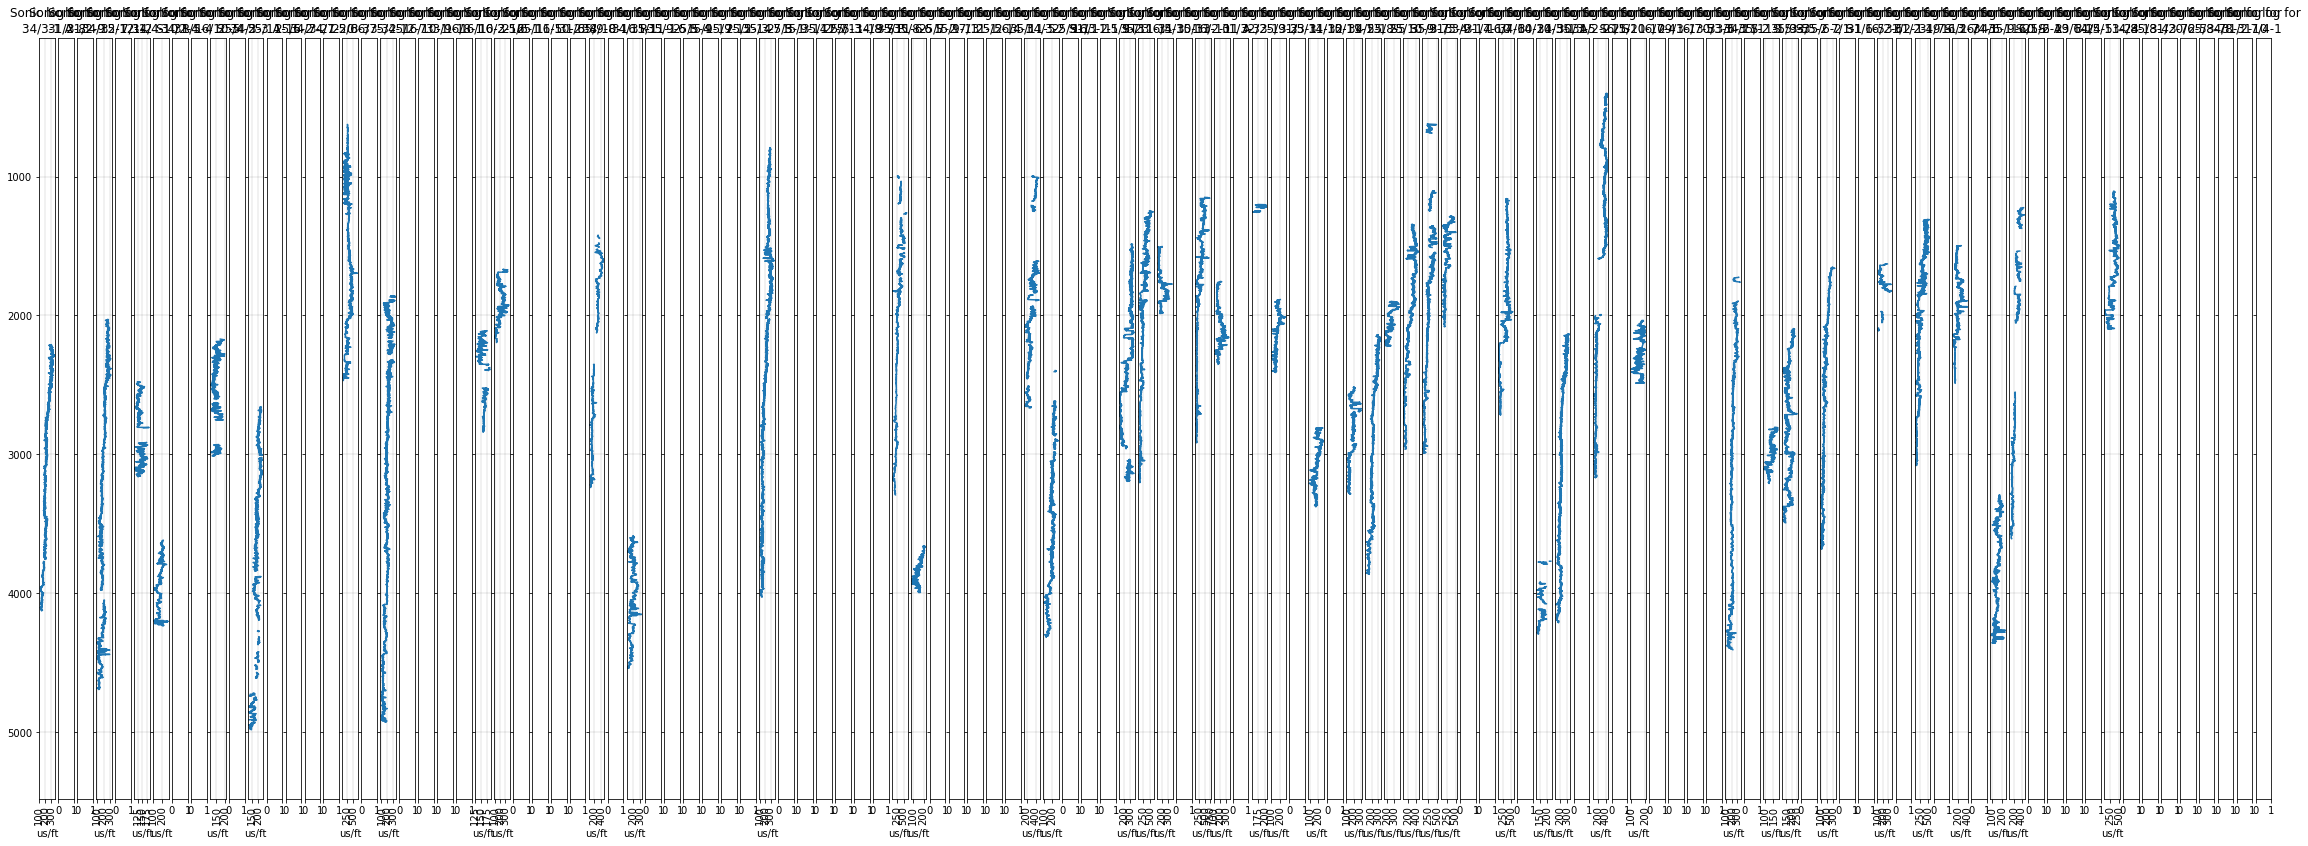

In [17]:
fig, axs = plt.subplots(figsize=(40, 14),
                        ncols=len(p),
                        sharey=True,
                        )

for i, (ax, w) in enumerate(zip(axs, p)):
    log = w.get_curve('Sonic', alias=alias)
    if log is not None:
        ax = log.plot(ax=ax)
    ax.set_title("Sonic log for\n{}".format(w.uwi))

min_z, max_z = p.basis_range
    
plt.ylim(max_z, min_z)

plt.show()

In [19]:
import welly.quality as q

tests = {
    'All': [q.no_similarities],
    'Each': [q.no_gaps, q.no_monotonic, q.no_flat],
    'GR': [q.all_positive],
    'Sonic': [q.all_positive, q.all_between(50, 200)],
}

In [20]:
from IPython.display import HTML

HTML(p.curve_table_html(keys=['Caliper', 'GR', 'Sonic', 'SP', 'RHOB'],
                        tests=tests, alias=alias)
    )

Idx,UWI,Data,Passing,Caliper*,GR,Sonic*,SP,RHOB
,,,%,118/118 wells,118/118 wells,46/118 wells,76/118 wells,118/118 wells
0,34/3-1 A,4/20 curves,84,CALI⬤8.74 in,GR⬤80.22 gAPI,DTS⬤215.55 us/ft,⬤,RHOB⬤2.53 g/cm3
1,31/2-8,4/19 curves,100,CALI⬤14.00 in,GR⬤65.10 gAPI,⬤,SP⬤60.02 mV,RHOB⬤2.26 g/cm3
2,31/2-9,4/19 curves,94,CALI⬤16.55 in,GR⬤62.91 gAPI,⬤,SP⬤66.68 mV,RHOB⬤2.06 g/cm3
3,34/12-1,4/21 curves,79,CALI⬤10.73 in,GR⬤74.27 gAPI,DTS⬤197.01 us/ft,⬤,RHOB⬤2.57 g/cm3
4,35/12-1,4/20 curves,88,CALI⬤15.81 in,GR⬤77.54 gAPI,⬤,SP⬤58.17 mV,RHOB⬤2.37 g/cm3
5,7/1-2 S,4/20 curves,95,CALI⬤8.57 in,GR⬤93.88 gAPI,DTS⬤137.75 us/ft,⬤,RHOB⬤2.29 g/cm3
6,34/4-10 R,4/19 curves,89,CALI⬤8.62 in,GR⬤113.53 gAPI,DTS⬤181.75 us/ft,⬤,RHOB⬤2.56 g/cm3
7,34/2-4,4/18 curves,94,CALI⬤15.43 in,GR⬤56.12 gAPI,⬤,SP⬤61.23 mV,RHOB⬤2.41 g/cm3
8,31/5-4 S,4/17 curves,88,CALI⬤9.91 in,GR⬤63.21 gAPI,⬤,SP⬤67.33 mV,RHOB⬤2.15 g/cm3
